# Simple Binary Classification on Adult Dataset

You can use this notebook to try out StickyLand!

To launch StickyLand, click the note icon in the toobar above.

![](https://i.imgur.com/kQyAEF3.png)

In [ ]:
# Install dependencies
%pip install numpy pandas matplotlib scikit-learn

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
%config InlineBackend.figure_format = 'retina'

## 1. Exploratory Data Analyais

### 1.1. Loading the Dataset

In [3]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    sep=', ',
    engine='python',
    header=None
)

column_names = [
    'Age', 'WorkClass', 'fnlwgt', 'Education', 'EducationNum',
    'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Gender',
    'CapitalGain', 'CapitalLoss', 'HoursPerWeek', 'NativeCountry', 'Income'
]
df.columns = [n.lower() for n in column_names]

df.shape

(32561, 15)

### Adult Features

The Adult dataset has 14 features.<br>
The output variable is binary (`income > 50k`).

In [4]:
df.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
sub_df = df[df['age'] < 20]
sub_df.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,income
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
37,19,Private,544091,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,0,0,25,United-States,<=50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
70,19,Private,101509,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,0,0,32,United-States,<=50K
78,18,Private,309634,11th,7,Never-married,Other-service,Own-child,White,Female,0,0,22,United-States,<=50K


### Task List [02/22]

- [x] Visualize the adult datatset
    - [x] Histogram of all features
    - [x] Scatter plot of `age` vs. `income`
- [x] Test ML models on new dataset
    - [x] XGBoost
    - [x] Explanable Boosting Machine
- [ ] Share the notebook with Ellie 😊

Also support $\LaTeX$!

In [6]:
def overlay_hist(df, c):
    """
    Plot two histogram of two values overlaying each other.
    """
    
    num_unique = len(df[c].unique())
    
    if df[c].dtype == 'object':
        counter_1 = Counter(df[c][df['target'] == 1])
        counter_2 = Counter(df[c][df['target'] != 1])

        bar_names = []
        bar_densities_1 = []
        bar_densities_2 = []

        for f in counter_1:
            bar_names.append(f)
            bar_densities_1.append(counter_1[f] / df.shape[0])
            bar_densities_2.append(counter_2[f] / df.shape[0])

        for f in counter_2:
            if f not in counter_1:
                bar_names.append(f)
                bar_densities_1.append(counter_1[f] / df.shape[0])
                bar_densities_2.append(counter_2[f] / df.shape[0])

        count_df = pd.DataFrame(np.c_[bar_densities_2, bar_densities_1], index=bar_names)
        ax = count_df.plot.bar(alpha=0.5)
        ax.set_title(c)
        ax.figure.autofmt_xdate(rotation=45)

    else:
        plt.hist(df[c][df['target'] == 1], alpha=0.5, density=True, label='>50k', bins=50)
        plt.hist(df[c][df['target'] != 1], alpha=0.5, density=True, label='<=50k', bins=50)
        plt.title(c)
        
    plt.legend(loc='upper right')
    print('Num of unique values: ', num_unique)
    plt.show()

### Task List [02/22]

- [x] Visualize the adult datatset
    - [x] Histogram of all features
    - [x] Scatter plot of `age` vs. `income`
- [x] Test ML models on new dataset
    - [x] XGBoost
    - [x] Explanable Boosting Machine
- [x] Share the notebook with Ellie 😊

Also support $\LaTeX$!

Transform the target variable `Income` as a binary variable.

In [7]:
df['target'] = [0 if l else 1 for l in (df['income'] == '<=50K')]
new_df = df.copy()

### 1.2. Data Engineering

In this section, we delete or transform some features before training the binary classifier.

In [8]:
intersted_feature = 'maritalstatus'

Num of unique values:  7


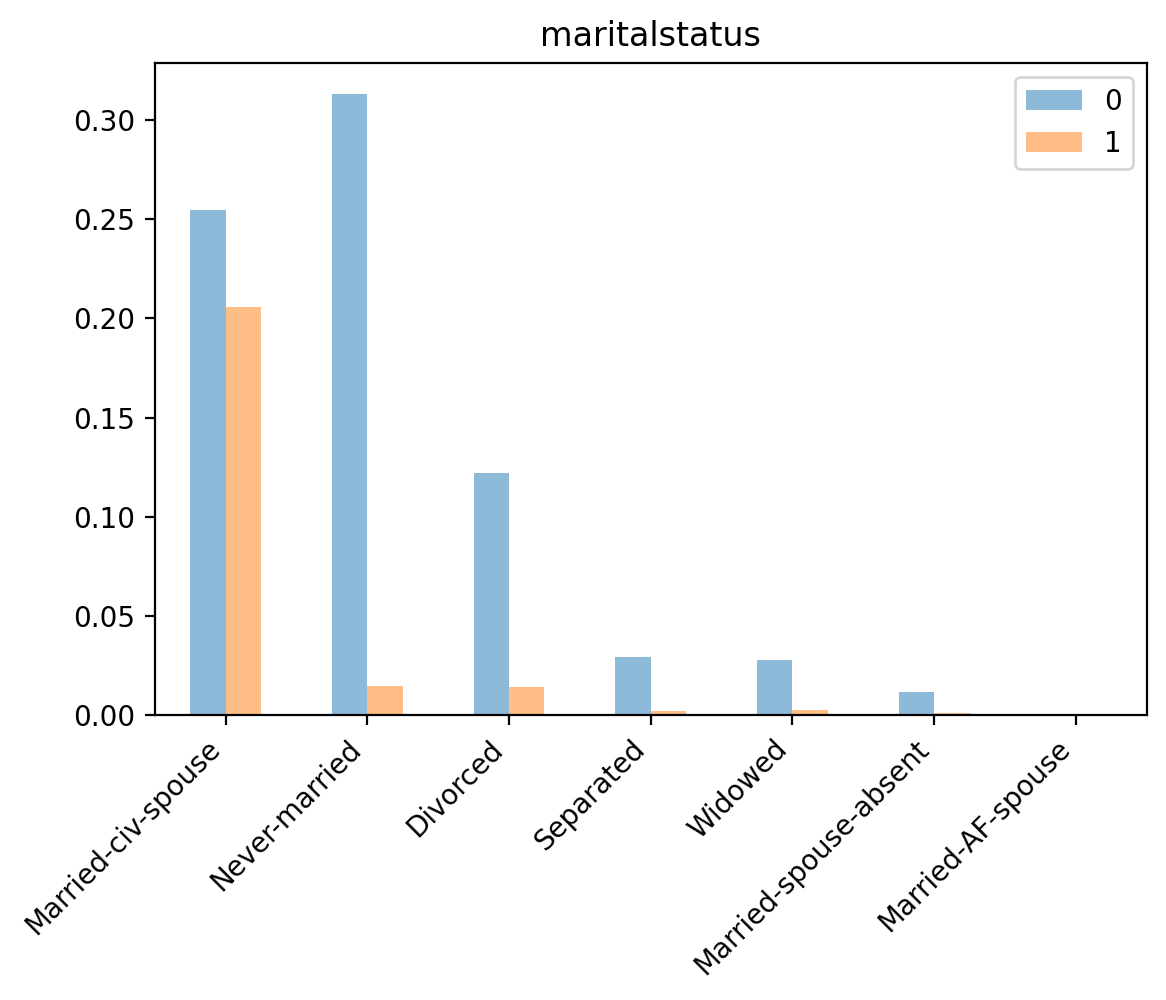

In [9]:
overlay_hist(df, intersted_feature)

The distribution difference between these two groups on age is quite significant.

Num of unique values:  9


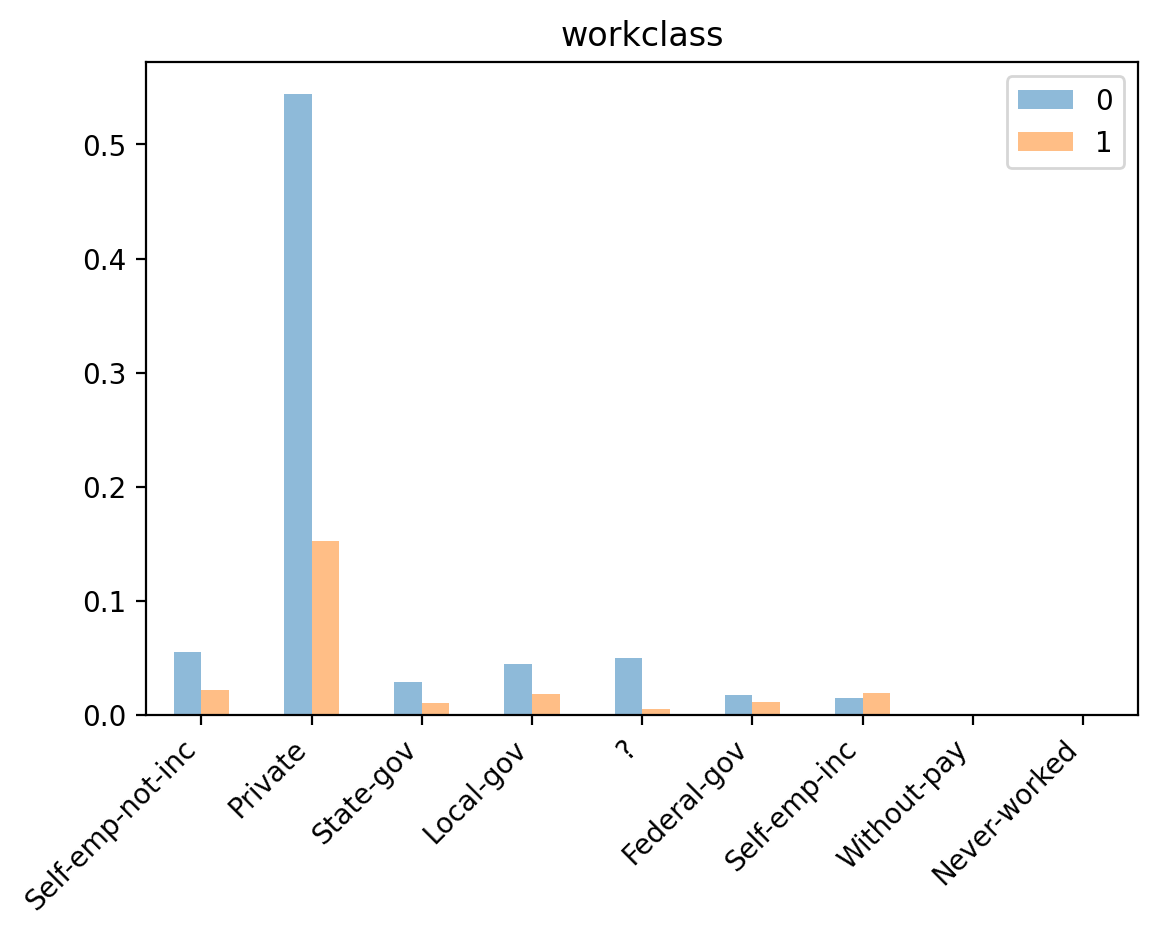

In [10]:
overlay_hist(df, 'workclass')

Num of unique values:  21648


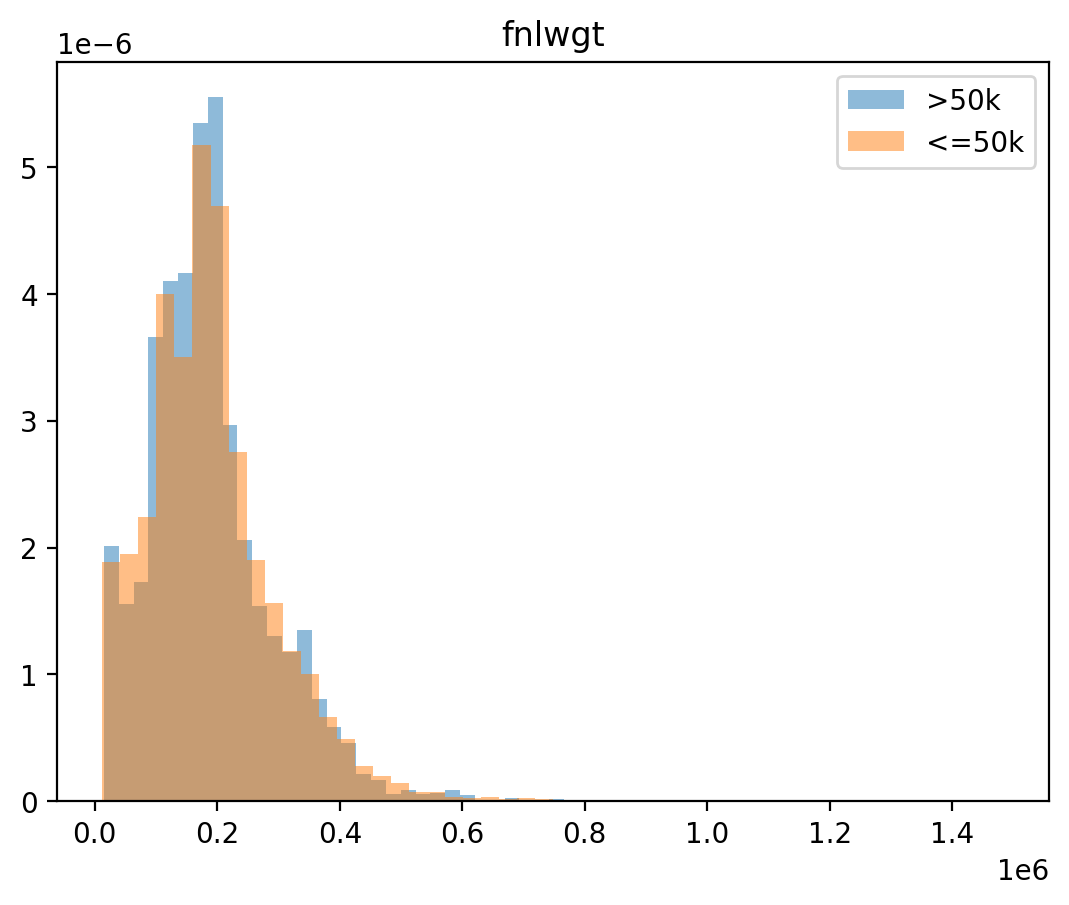

In [11]:
overlay_hist(df, 'fnlwgt')

`fnlwgt` stands for "Final Weight", which is used to give weight to different sample so that people with similar demographic characteristics have the same weight. This feature is not really useful in this model.

In [12]:
del new_df['fnlwgt']

Num of unique values:  16


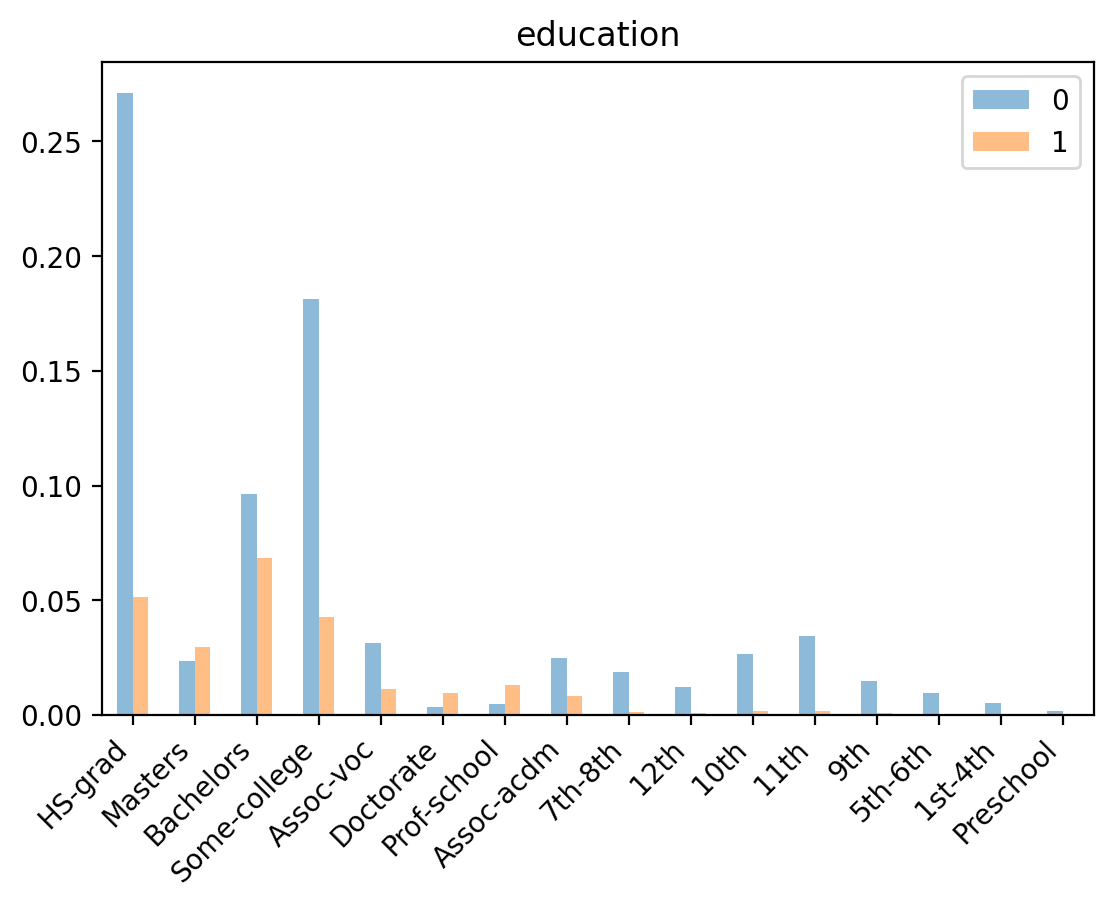

In [13]:
overlay_hist(df, 'education')

Num of unique values:  16


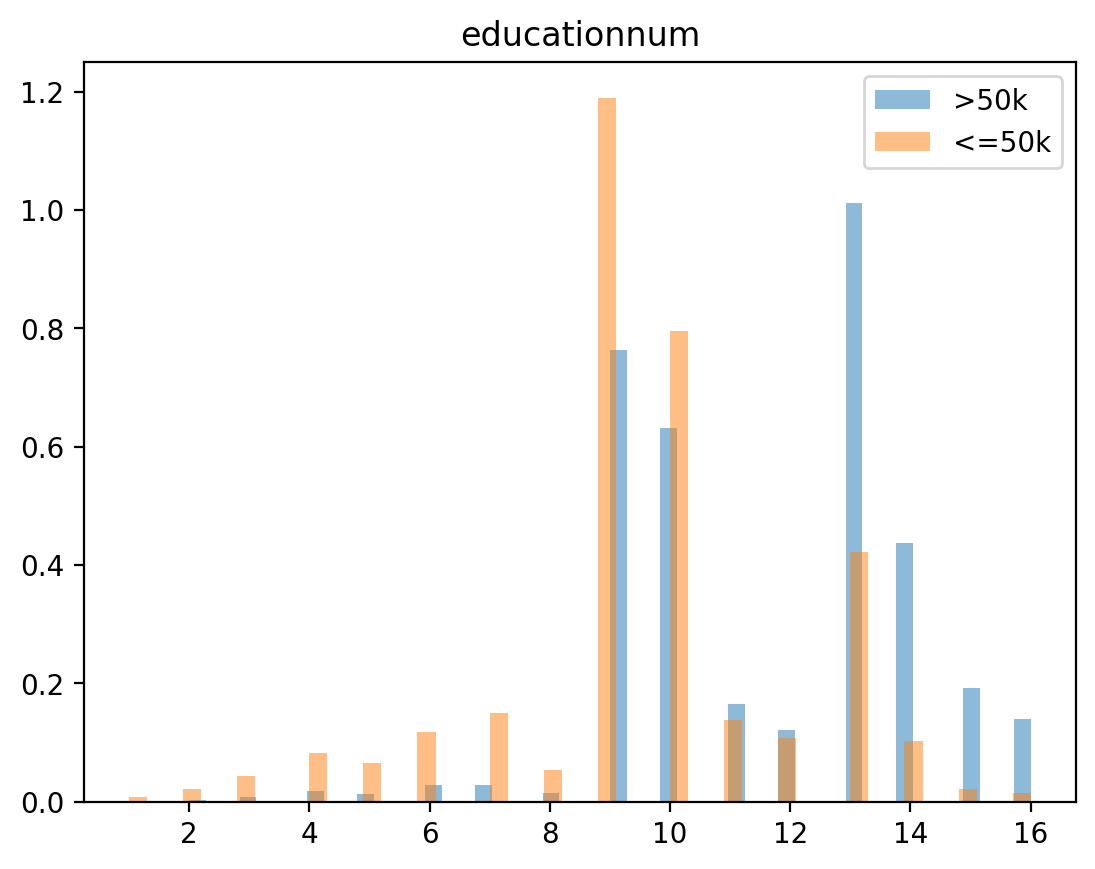

In [14]:
overlay_hist(df, 'educationnum')

Num of unique values:  7


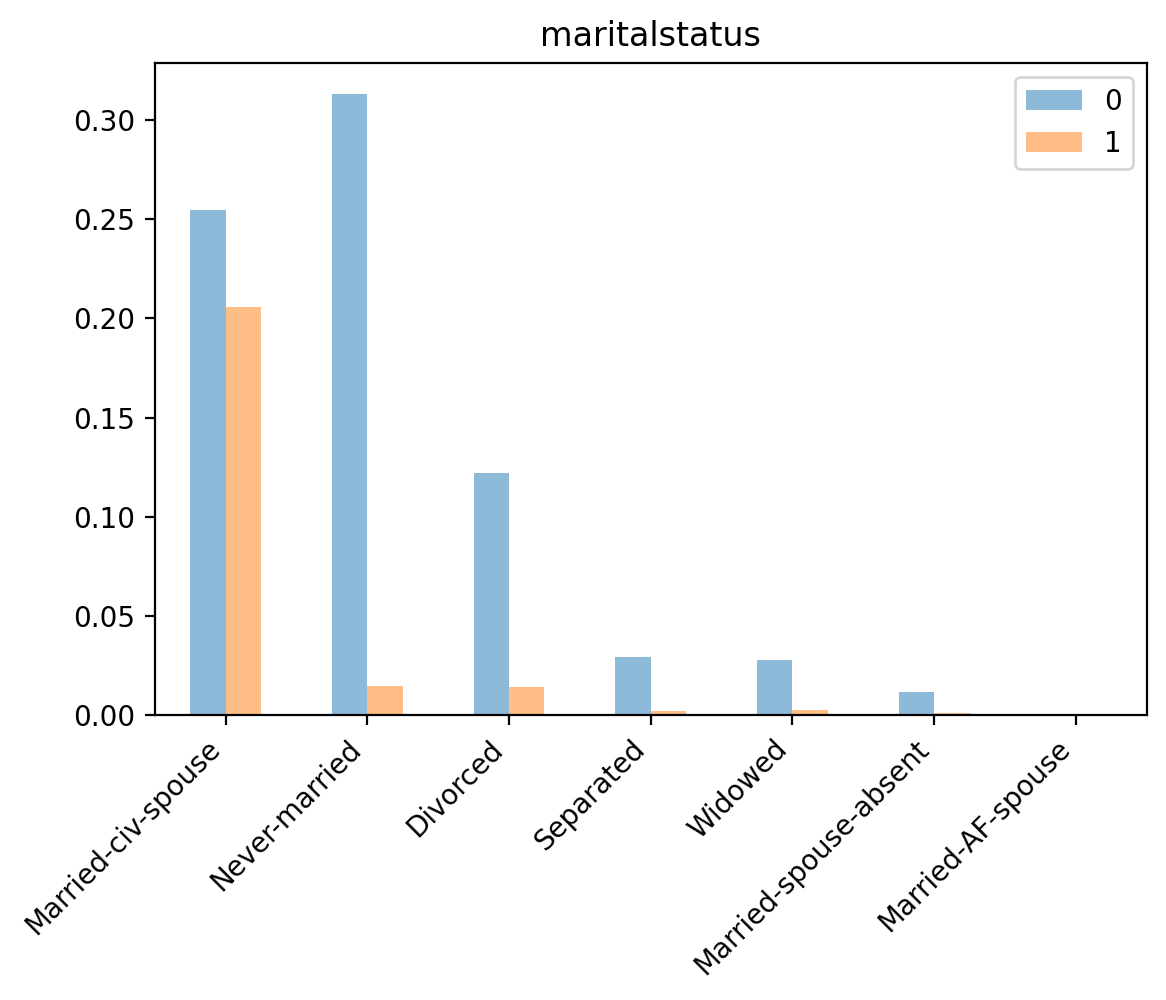

In [15]:
overlay_hist(df, 'maritalstatus')

Num of unique values:  15


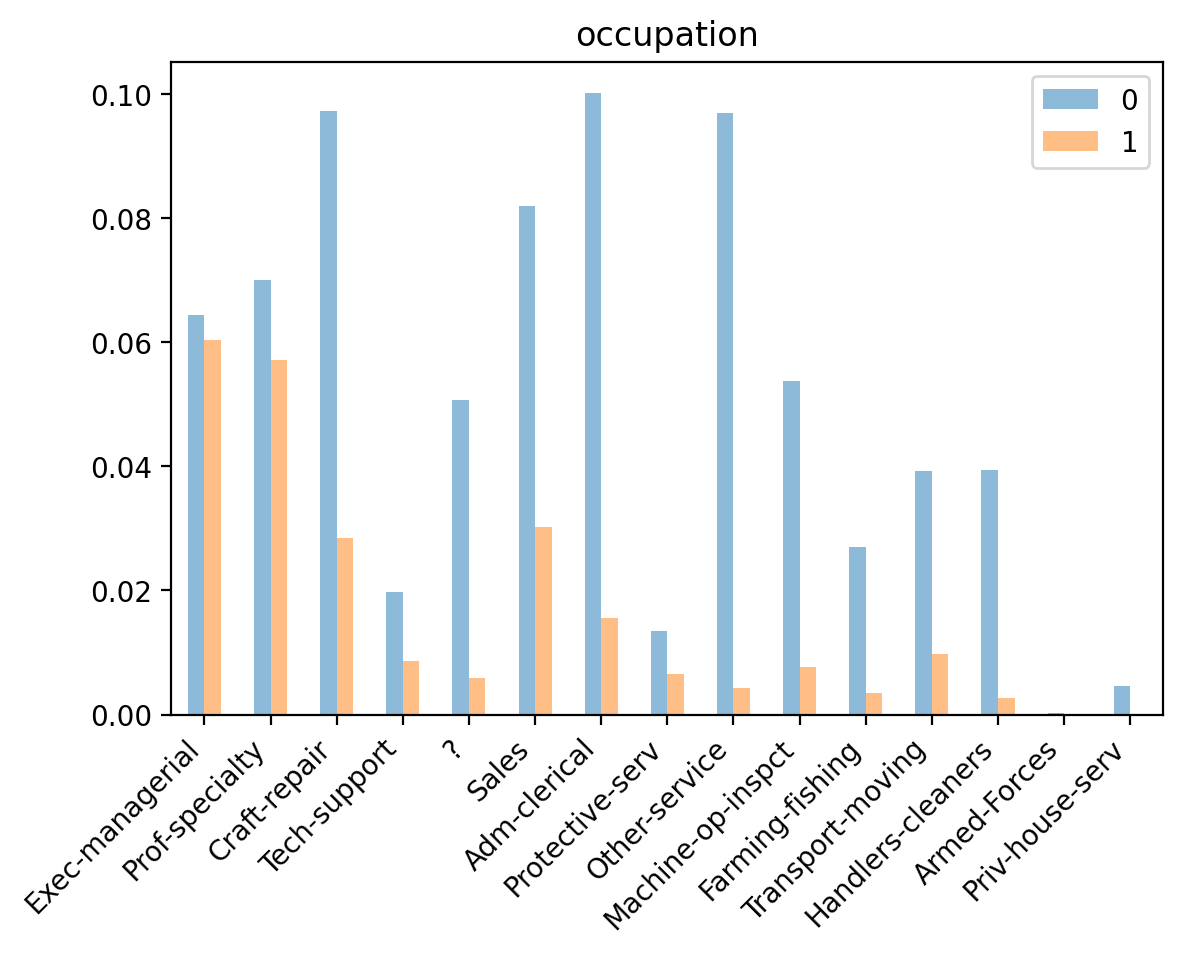

In [16]:
overlay_hist(df, 'occupation')

Num of unique values:  6


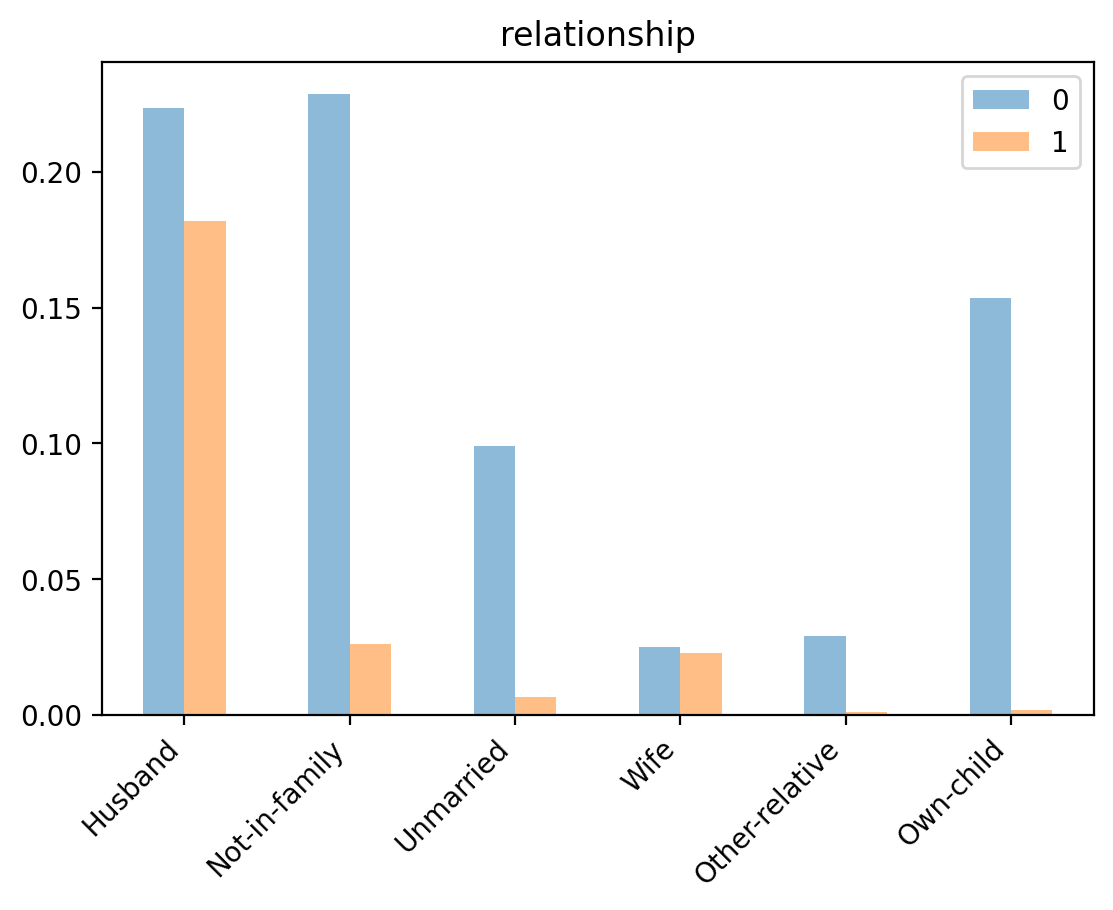

In [17]:
overlay_hist(df, 'relationship')

Num of unique values:  5


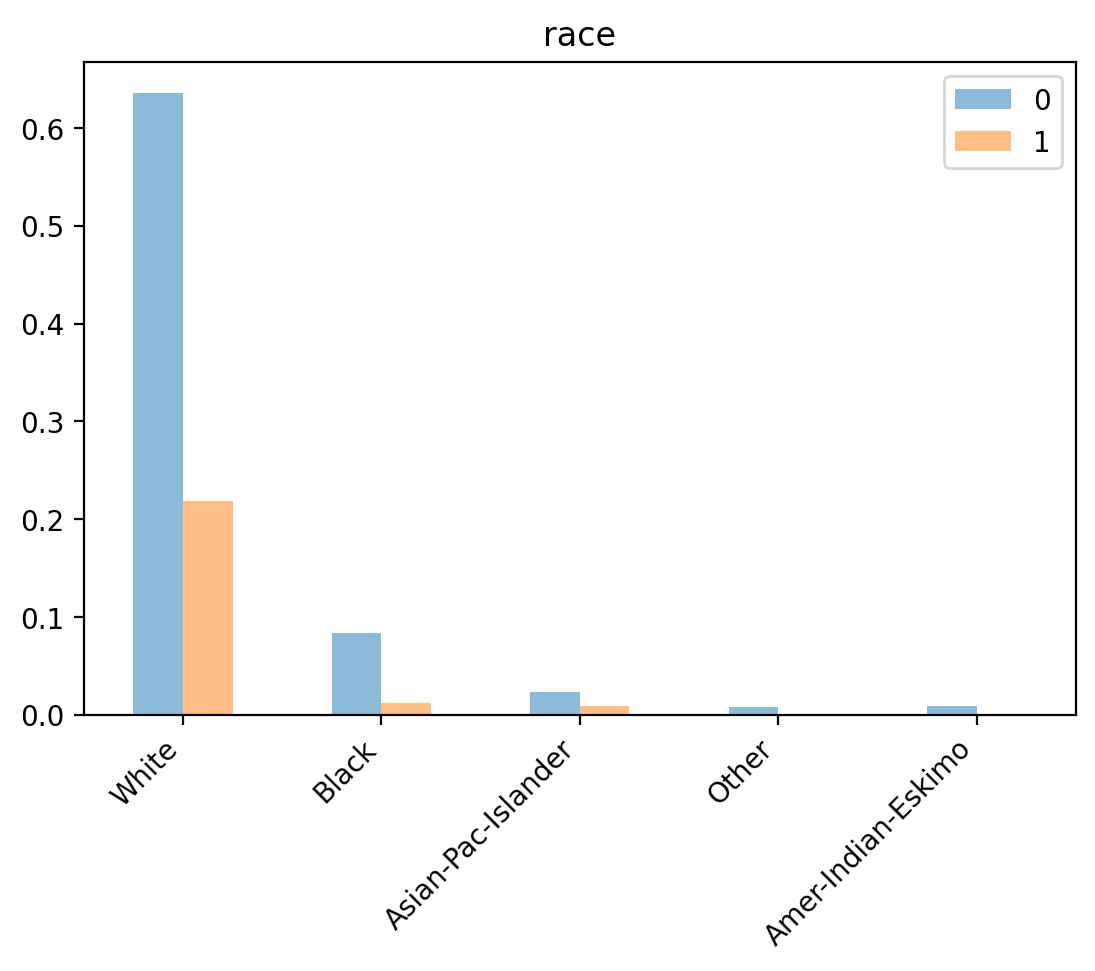

In [18]:
overlay_hist(df, 'race')

Num of unique values:  2


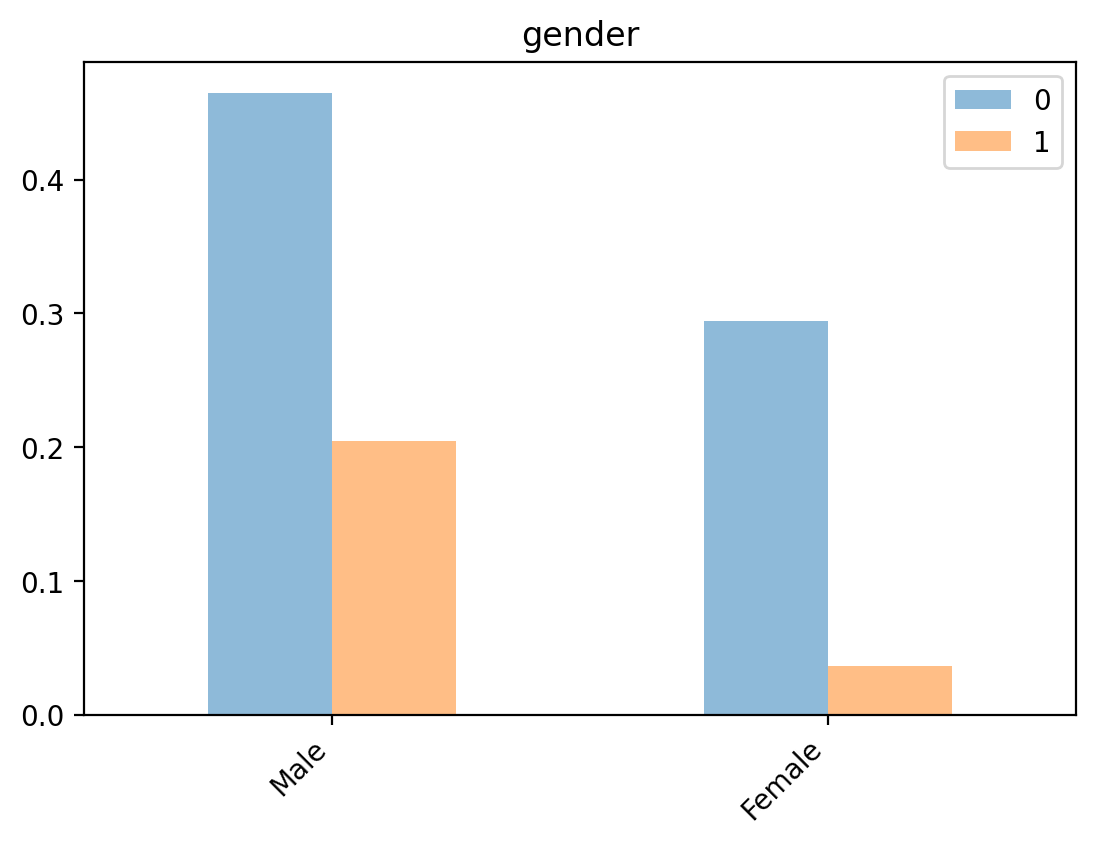

In [19]:
overlay_hist(df, 'gender')

Num of unique values:  119


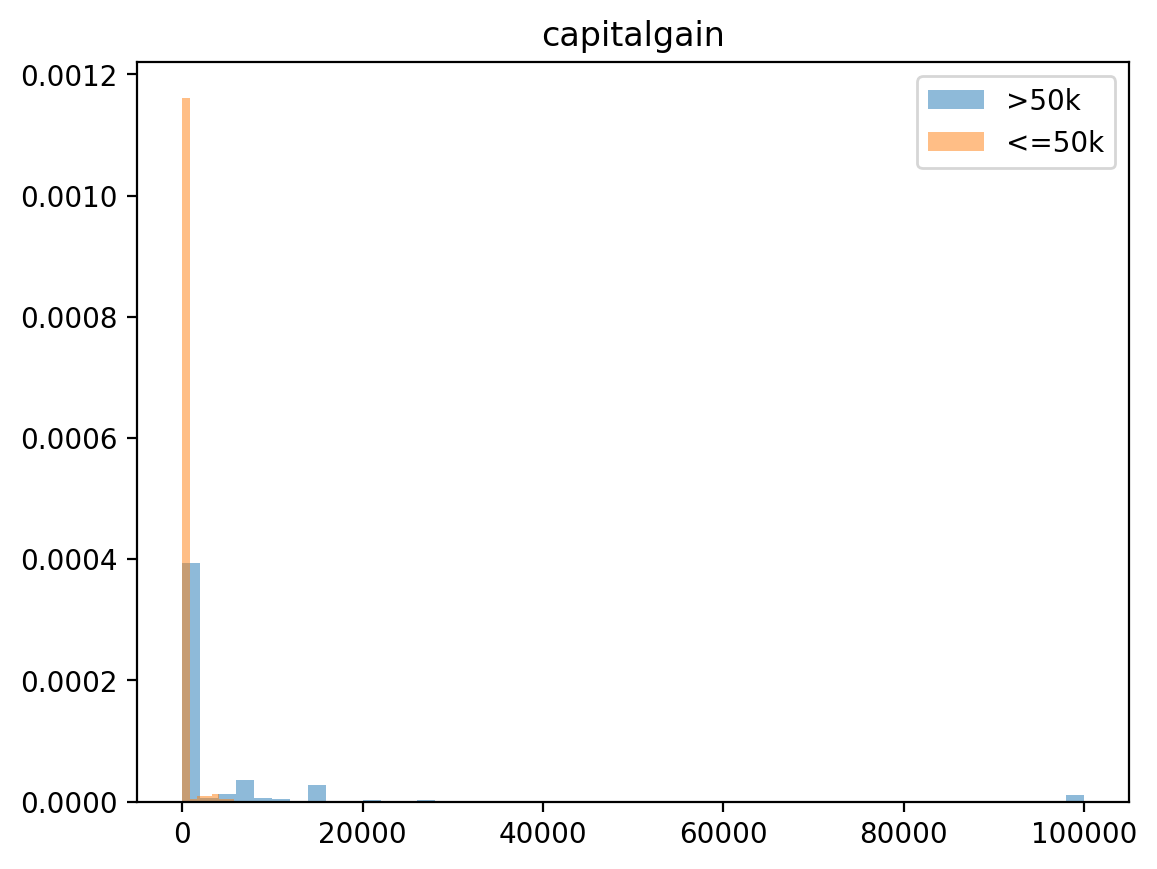

In [20]:
overlay_hist(df, 'capitalgain')

Num of unique values:  92


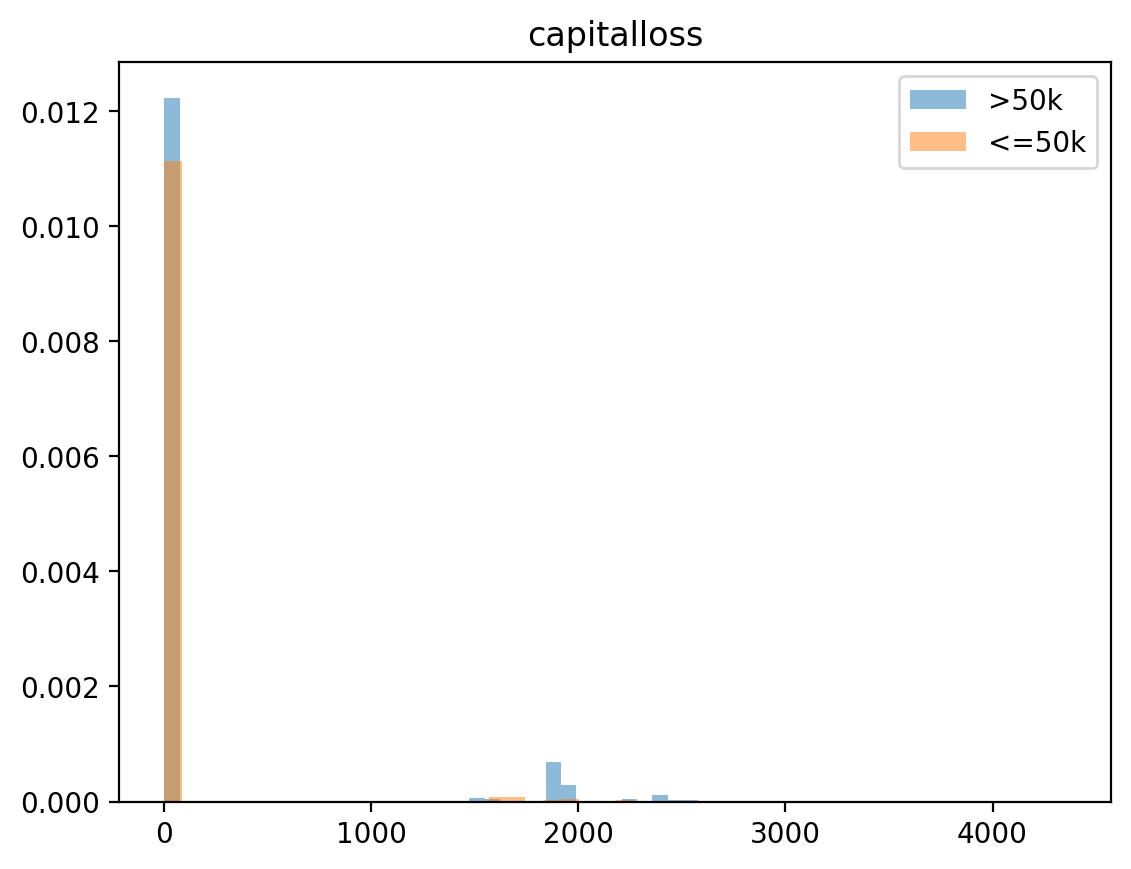

In [21]:
overlay_hist(df, 'capitalloss')

These two features `capitalgain` and `capitalloss` have many 0 values. It makes sense, because the census define capital gain/loss as the profit/loss of asset sales (stocks or real estate). Not all people would yield cpaital gain/loss in a particular. We can convert these two variables as binary features `has_capitalgain` and `has_capitalloss`.

In [22]:
new_df['has_capitalgain'] = [int(t) for t in df['capitalgain'] != 0]
new_df['has_capitalloss'] = [int(t) for t in df['capitalloss'] != 0]

del new_df['capitalgain']
del new_df['capitalloss']

Num of unique values:  94


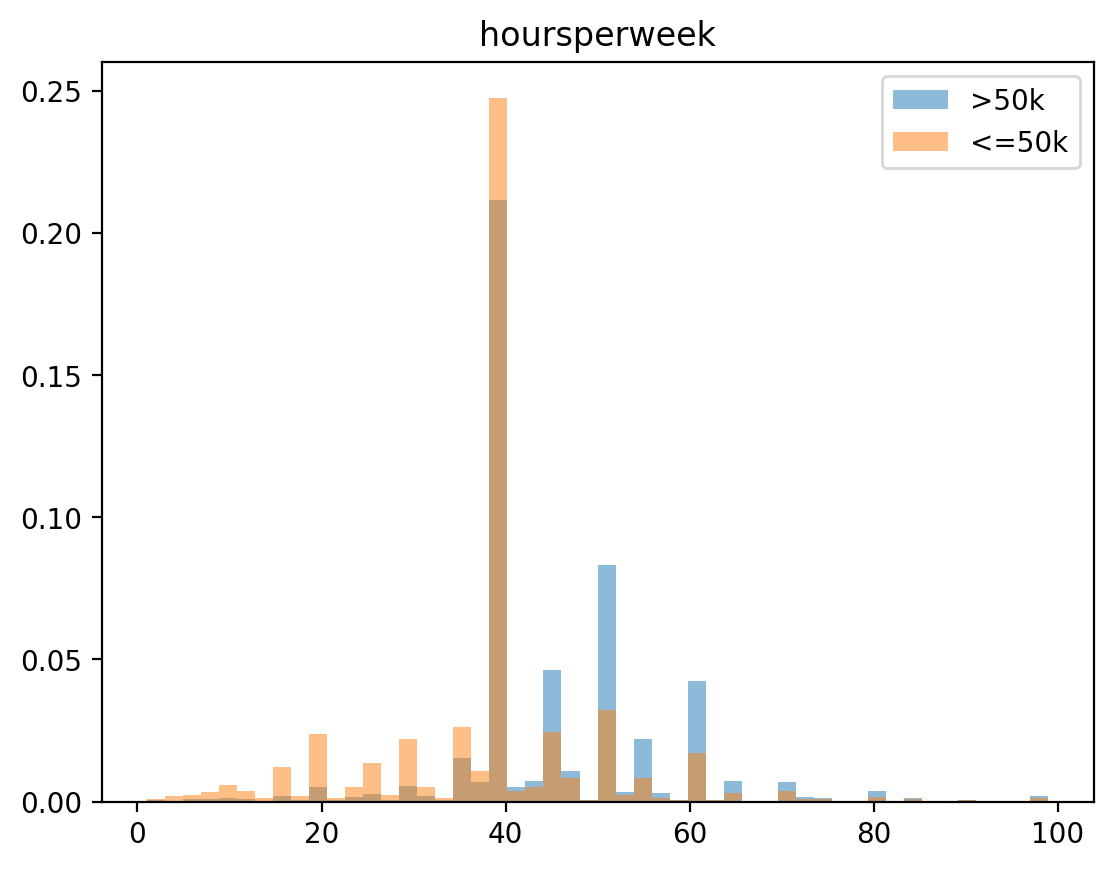

In [23]:
overlay_hist(df, 'hoursperweek')

Working 40 hours a week is typical in the dataset. Interestingly people who earn more tend to work longer.

Num of unique values:  42


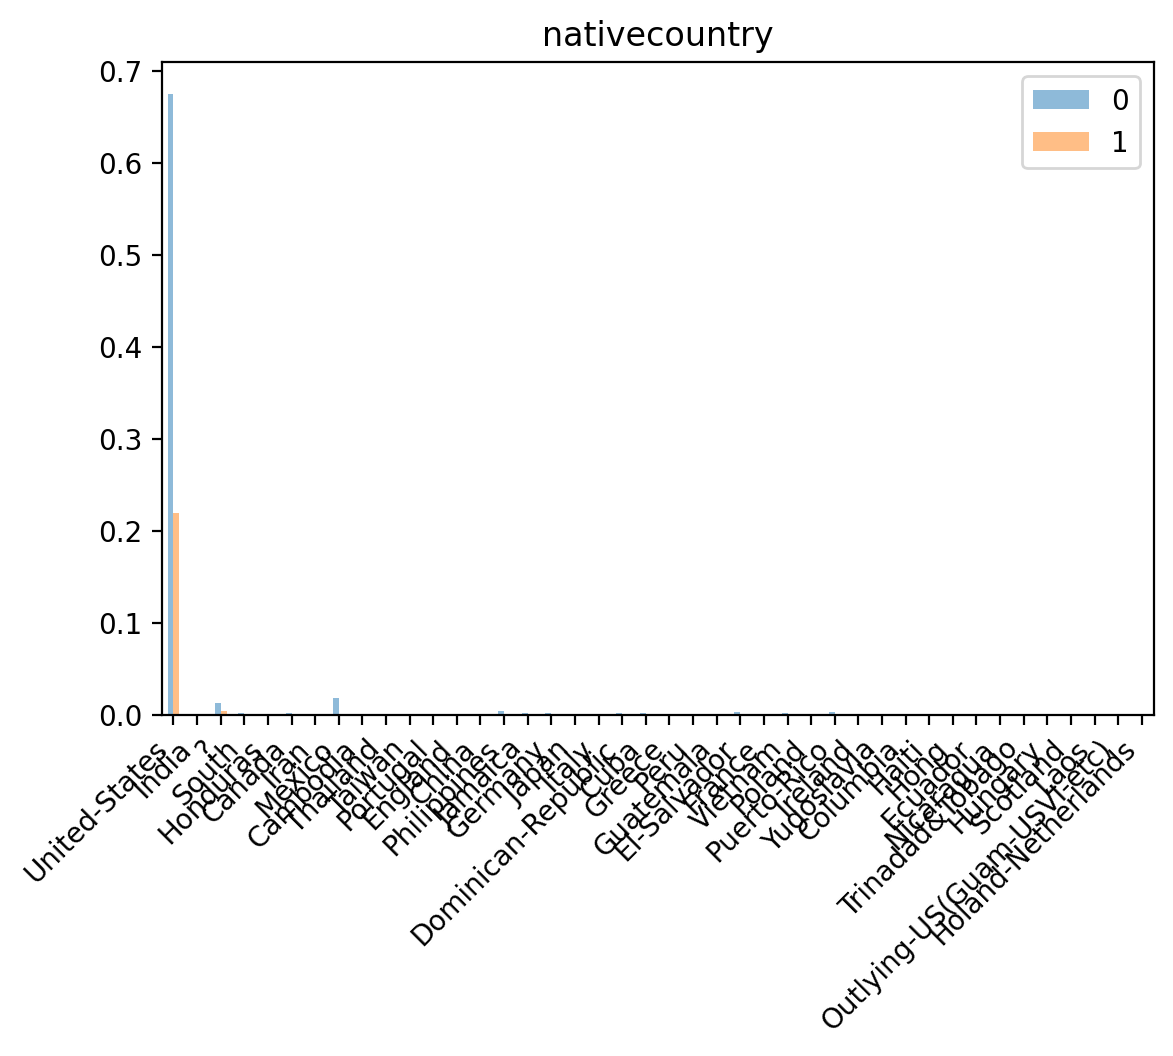

In [24]:
overlay_hist(df, 'nativecountry')

The majority of the native country is the US. We can encode it as another binary variable `from-usa` to decrease the number of levels.

In [25]:
new_df['from_usa'] = [int(t) for t in df['nativecountry'] == 'United-States']
del new_df['nativecountry']

Num of unique values:  2


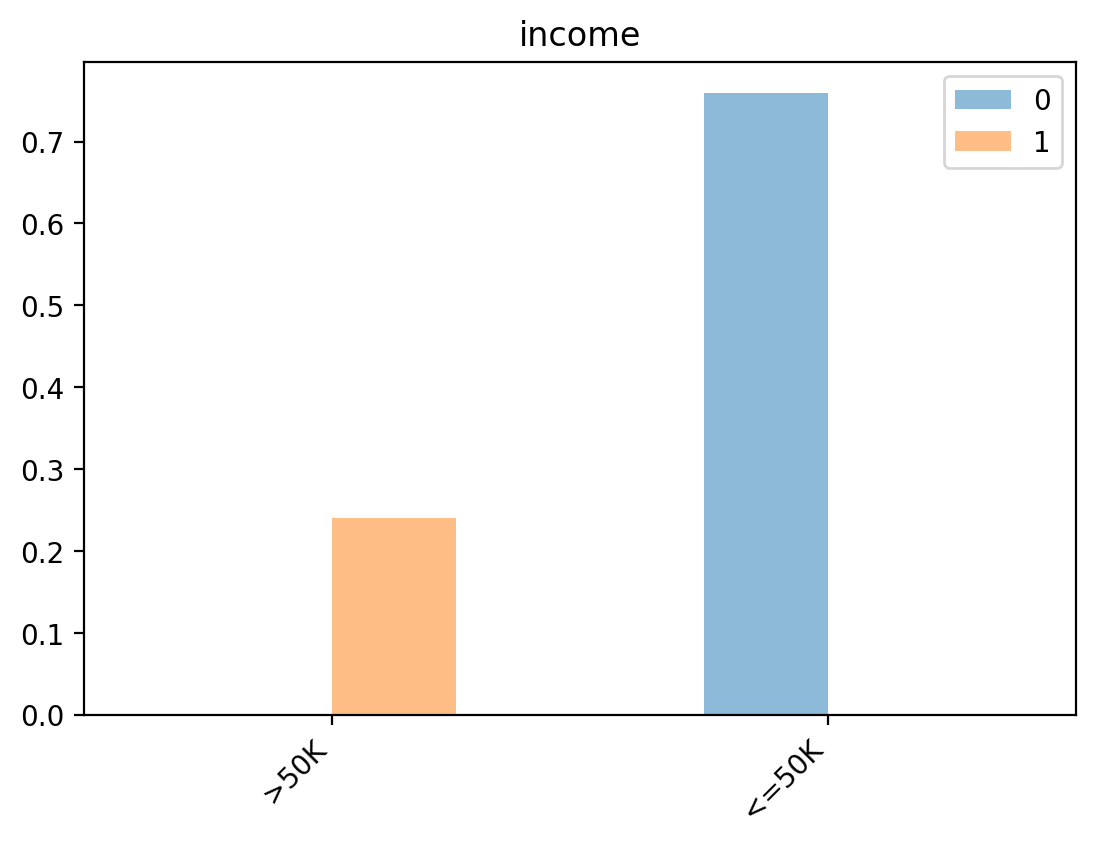

In [26]:
overlay_hist(df, 'income')

It shows this dataset is quite imbalanced.

In [27]:
new_df.head()

,age,workclass,education,educationnum,maritalstatus,occupation,relationship,race,gender,hoursperweek,income,target,has_capitalgain,has_capitalloss,from_usa
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K,0,1,0,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K,0,0,0,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K,0,0,0,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K,0,0,0,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K,0,0,0,0


## Image Augmentation

In [ ]:
# Install dependencies
%pip install imageio albumentations

In [29]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import cv2
import albumentations as A
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [30]:
def load_random_image():
    image = imageio.imread('https://picsum.photos/200/300')

    image = image[:, :, :3]

    s = 250
    transform = A.Resize(height=s, width=s)
    augmented = transform(image=image)
    image = augmented['image']
    
    return image

In [31]:
def rotate(image):
    """Rotate the image using Albumentations"""
    transform = A.Rotate(limit=(-10, -9), p=1.0)
    augmented = transform(image=image)
    return augmented['image']

def add_noise(image):
    """Add coarse dropout noise using Albumentations"""
    h, w = image.shape[:2]
    transform = A.CoarseDropout(p=0.50)
    augmented = transform(image=image)
    return augmented['image']

def multiply_hue_saturation(img, factor):
    # Convert RGB to HSV (note: OpenCV uses hue range [0,179])
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float32)
    hsv[..., 0] = np.clip(hsv[..., 0] * factor, 0, 179)
    hsv[..., 1] = np.clip(hsv[..., 1] * factor, 0, 255)
    return cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)

def corrupt(image):
    """Corrupt the image by boosting hue and saturation twice"""
    image = multiply_hue_saturation(image, 4)
    image = multiply_hue_saturation(image, 4)
    return image  

/var/folders/3k/qxxyhlzn3zvbg2k943x0lw5c0000gn/T/ipykernel_80070/909992720.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('https://picsum.photos/200/300')


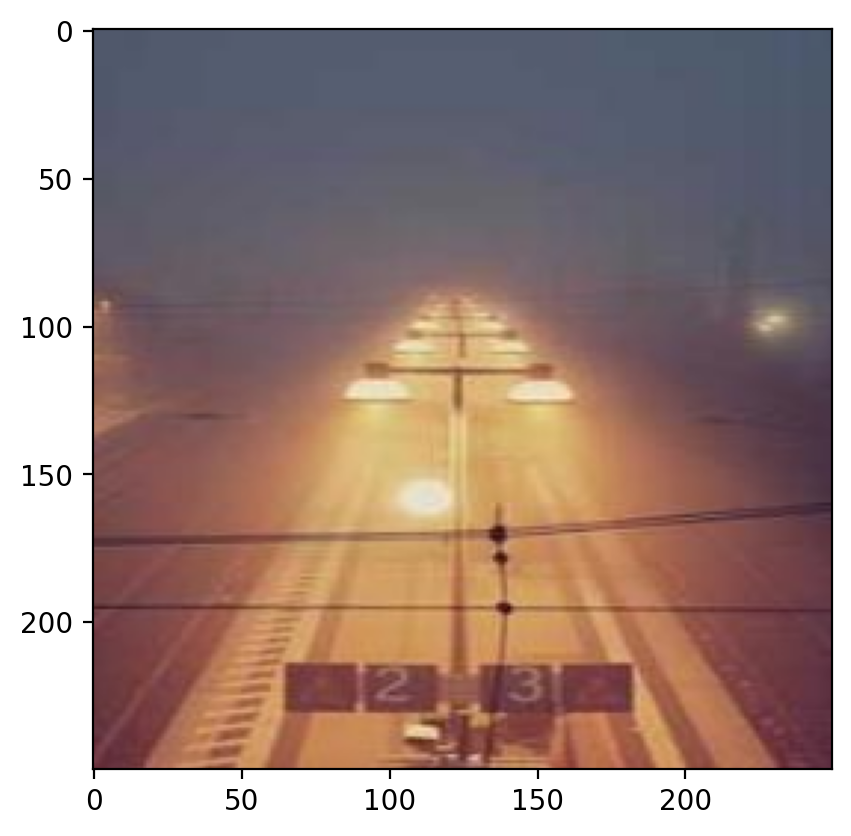

In [40]:
image = load_random_image()
plt.imshow(image);

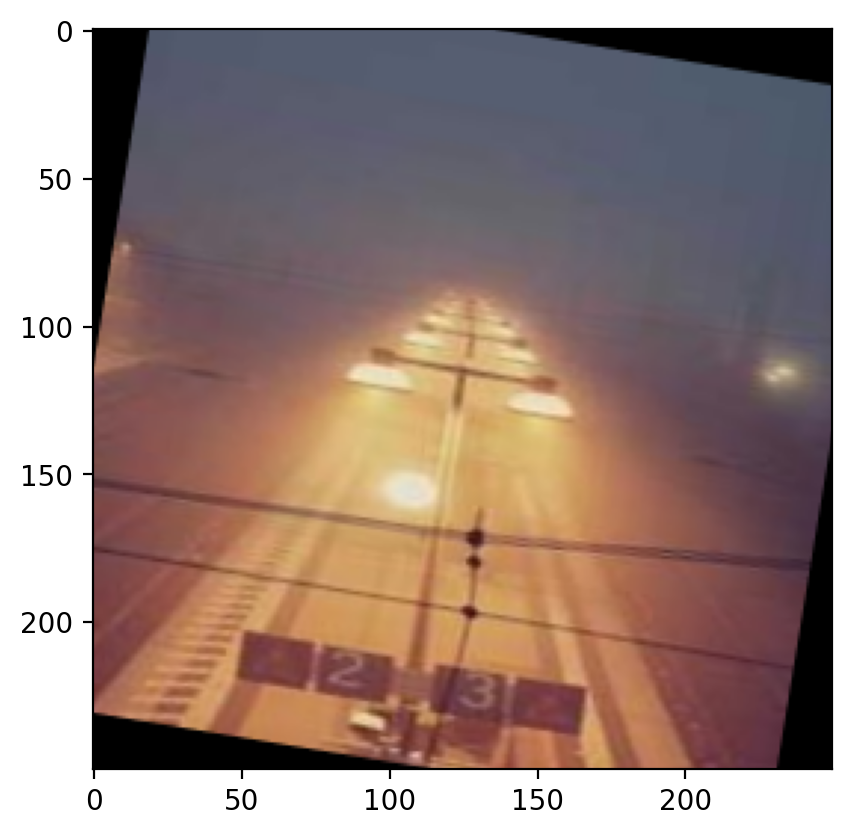

In [41]:
image = rotate(image)
plt.imshow(image);

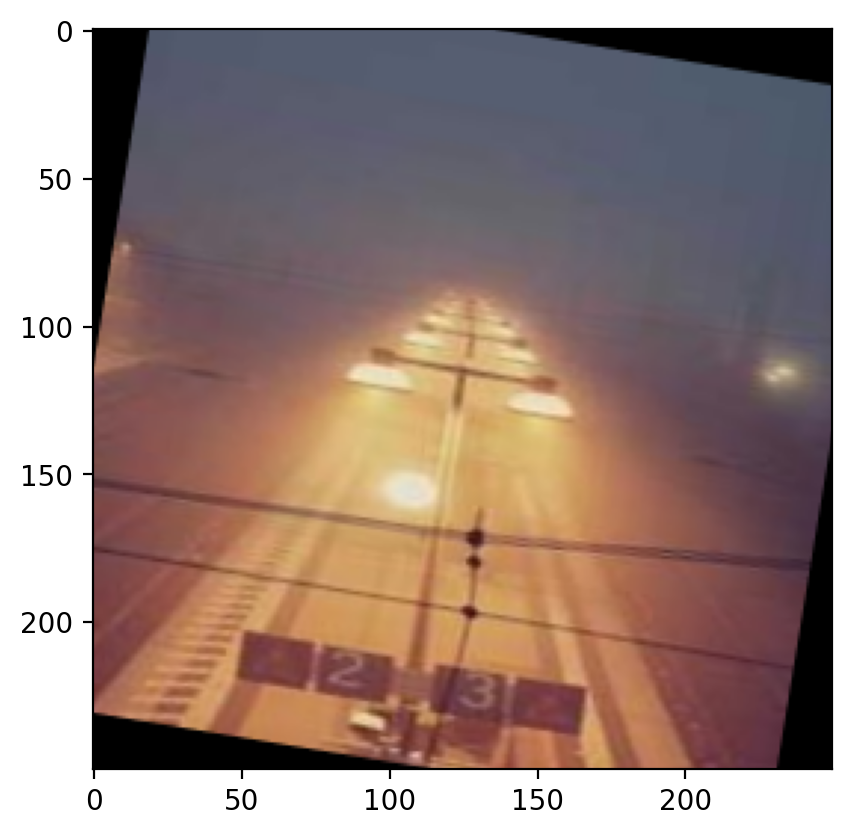

In [42]:
image = add_noise(image)
plt.imshow(image);

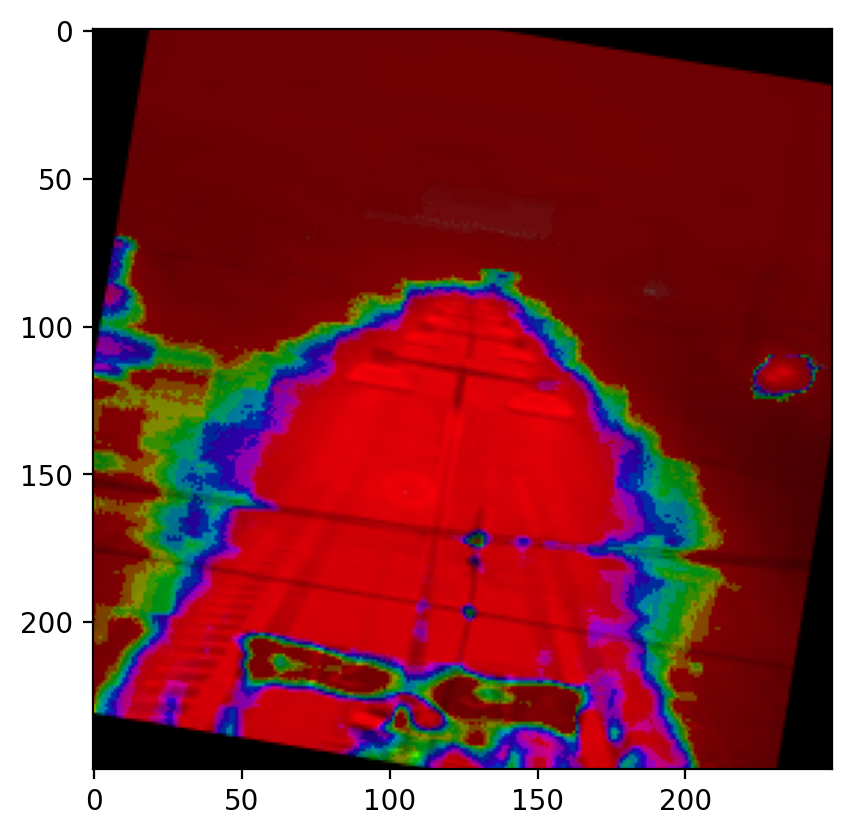

In [43]:
image = corrupt(image)
plt.imshow(image);

<br>
<br>
<br><br>
<br>

<br>
<br>
<br>
<br>